<a href="https://colab.research.google.com/github/bigdata210/Python/blob/main/Spines%26Grids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Spines(윤곽선)
# 축공간이라고 부르는 그림이 그려지는 공간은 axes
# 눈금이 붙는 부분의 이름은 spines
import seaborn as sns
tips = sns.load_dataset("tips")
tips_day = tips.groupby("day")["tip"].mean().reset_index()
print(tips)
print(tips_day)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


In [8]:
import seaborn as sns
tips= sns.load_dataset('tips')
tips_day = tips.groupby('day')['tip'].mean().reset_index()
print(tips)
print(tips_day)


def plot_example(ax, zorder = 0):
    ax.bar(tips_day['day'], tips_day['tip'],color = 'lightblue', zorder=zorder)
    ax.set_title('tip(mean)', fontsize=16, pad=12) 

#Values
    h_pad = 0.1
    for i in range(4):
        fontweight = 'normal'
        color = 'k'
        if i == 3:
            fontweight = 'bold'
            color = 'darkblue'

        ax.text(i, tips_day['tip'].loc[i]+ h_pad, f'{tips_day["tip"].loc[i]:0.2f}',
                horizontalalignment= 'center', fontsize=12, fontweight= fontweight,color=color)
        
    # Sunday
    ax.patches[3].set_facecolor('darkblue')
    ax.patches[3].set_edgecolor('black')

    #set_range
    ax.set_ylim(0,4)
    return ax 

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
    day       tip
0  Thur  2.771452
1   Fri  2.734737
2   Sat  2.993103
3   Sun  3.255132


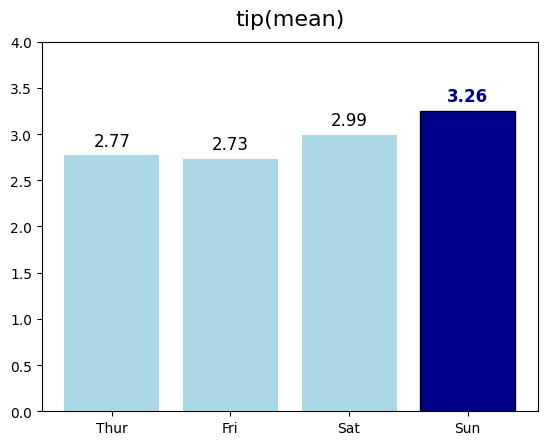

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax = plot_example(ax)

In [10]:
type(ax.spines)

matplotlib.spines.Spines

In [11]:
for k, v in ax.spines.items():
  print(f"spines[{k}]={v}")

spines[left]=Spine
spines[right]=Spine
spines[bottom]=Spine
spines[top]=Spine


In [12]:
ax.spines.values()

ValuesView(<matplotlib.spines.Spines object at 0x7f94d293cfd0>)

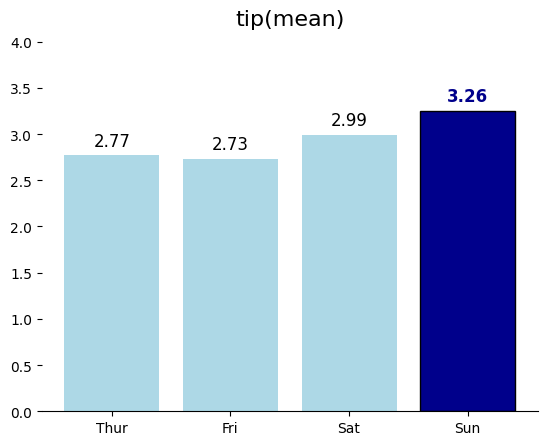

In [13]:
# spine 숨기기 
# .set_visible(False)

fig, ax =plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)

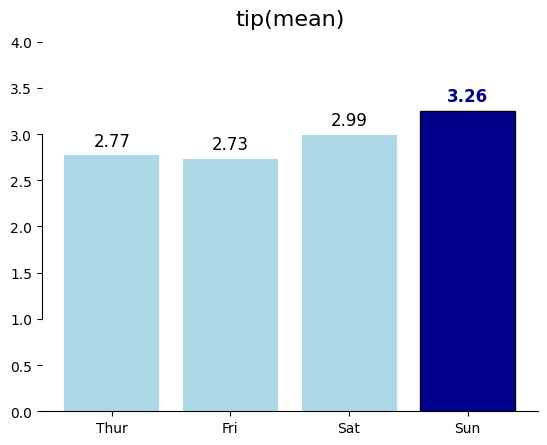

In [14]:
# spine 범위 지정하기
# .set_bounds(min, max)

fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.spines["left"].set_bounds(1,3)

In [15]:
# spine 위치 지정하기
# .set_position((direction, distance))

ax.spines["left"].get_position()

('outward', 0.0)

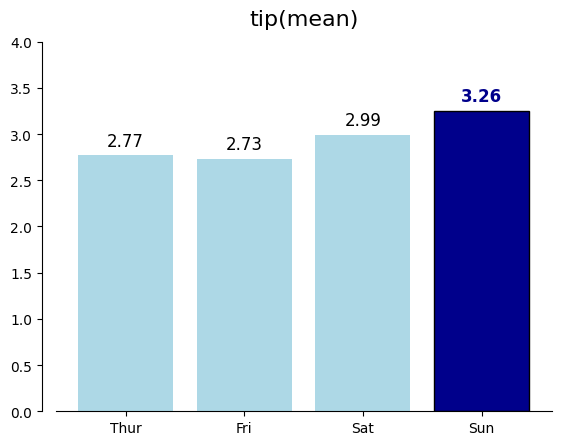

In [16]:
fig, ax = plt.subplots()
ax = plot_example(ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_position(("outward",10))

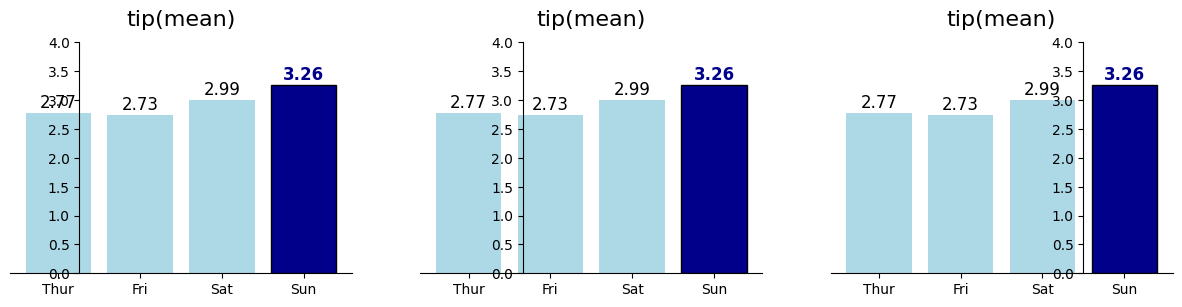

In [17]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))

for i in range(3):   # 그래프 3개 한번에 그리기
  ax[i] = plot_example(ax[i])
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)

# ax[0] : spine을 data 영역에서 지정된 거리만큼 이동
ax[0].spines["left"].set_position(("outward",-50))

# ax[1] : spine을 axes의 지정된 위치에 설정
ax[1].spines["left"].set_position(("axes",0.3))

# ax[2] : spine을 data의 지정된 위치에 설정
ax[2].spines["left"].set_position(("data",2.5))

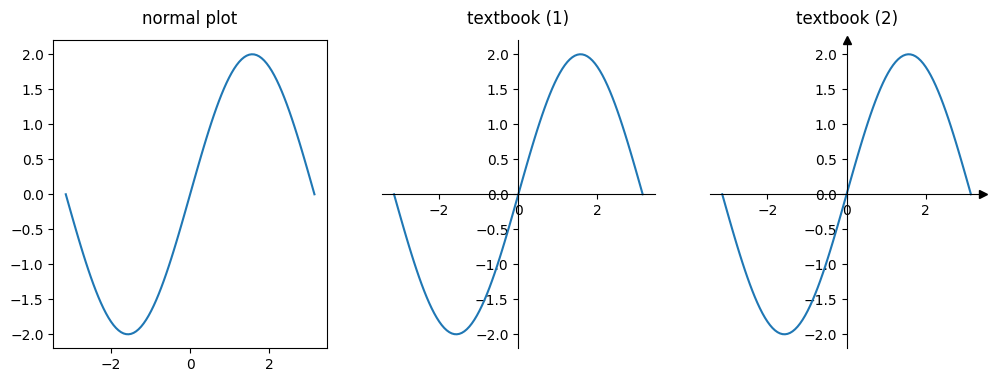

In [18]:
## data
import numpy as np
x = np.linspace(-np.pi, np.pi, 100)
y = 2 * np.sin(x)

fig, ax = plt.subplots(ncols=3, figsize=(12,4))

## normal plot
ax[0].plot(x,y)
ax[0].set_title("normal plot", pad=12)

## textbook (1)
ax[1].plot(x,y)
ax[1].set_title("textbook (1)", pad=12)
# top, right는 안보이게
ax[1].spines["top"].set_visible(False)
ax[1].spines["right"].set_visible(False)
# left, bottom은 (0,0)을 지나가게
ax[1].spines["left"].set_position(("data",0))
ax[1].spines["bottom"].set_position(("data",0))

## textbook (2)
ax[2].plot(x,y)
ax[2].set_title("textbook (2)", pad=12)
# top, right는 안보이게
ax[2].spines["top"].set_visible(False)
ax[2].spines["right"].set_visible(False)
# left, bottom은 (0,0)을 지나가게
ax[2].spines["left"].set_position(("data",0))
ax[2].spines["bottom"].set_position(("data",0))
# 화살표 추가
ax[2].plot(1,0, ">k", transform=ax[2].get_yaxis_transform(), clip_on=False)
ax[2].plot(0,1, "^k", transform=ax[2].get_xaxis_transform(), clip_on=False)

plt.show()

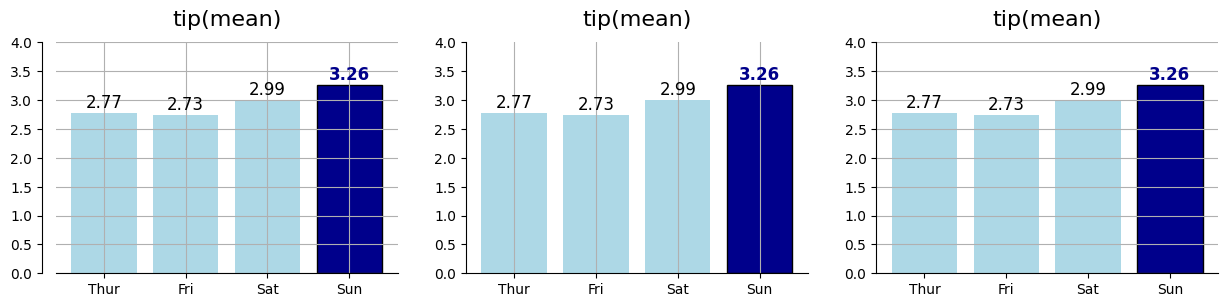

In [19]:
# grid (격자)

fig, ax = plt.subplots(ncols=3, figsize=(15,3))

for i in range(3):   # 그래프 3개 한번에 그리기
  ax[i] = plot_example(ax[i])
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[0].spines["left"].set_position(("outward",10))

# ax[0] : x,y 둘 다
ax[0].grid(axis = "both")

# ax[1] : x축에서만
ax[1].grid(axis = "x")

# ax[2] : y축에서만
ax[2].grid(axis = "y")

[]

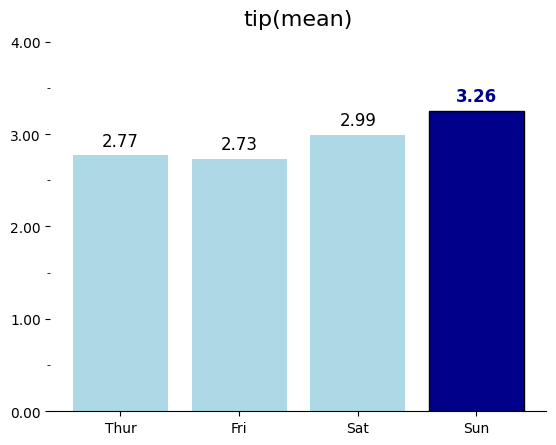

In [20]:
# major and minor ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()
ax = plot_example(ax)

# top, right, left spines 안보이기
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# y축 tick 설정
ax.yaxis.set_major_locator(MultipleLocator(1))   # major tick을 1 단위로 설정
ax.yaxis.set_major_formatter('{x:0.2f}')         # major tick format 지정 (오류나면 matplotlib upgrade)
ax.yaxis.set_minor_locator(MultipleLocator(0.5)) # minor tick을 0.5 단위로 지정

plt.plot()

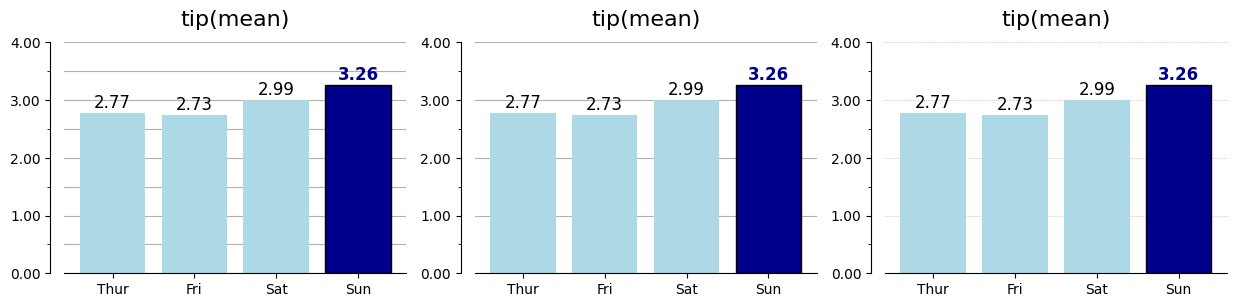

In [21]:
# major grid only
fig, ax = plt.subplots(ncols=3, figsize=(15,3))

for i in range(3):   # 그래프 3개 한번에 그리기
  ax[i] = plot_example(ax[i], zorder=2)  # zorder: bar를 grid 앞으로
  ax[i].spines["top"].set_visible(False)
  ax[i].spines["right"].set_visible(False)
  ax[i].spines["left"].set_position(("outward",10))
  ax[i].yaxis.set_major_locator(MultipleLocator(1))
  ax[i].yaxis.set_major_formatter('{x:0.2f}')
  ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))

# ax[0] : major, minor 둘 다
ax[0].grid(axis="y", which ="both")

# ax[1] : major만
ax[1].grid(axis="y", which="major")

# ax[2] : major만 + 여러 옵션
ax[2].grid(axis="y", which="major", color="r", ls=":", lw=0.5, alpha=0.5)

plt.show()


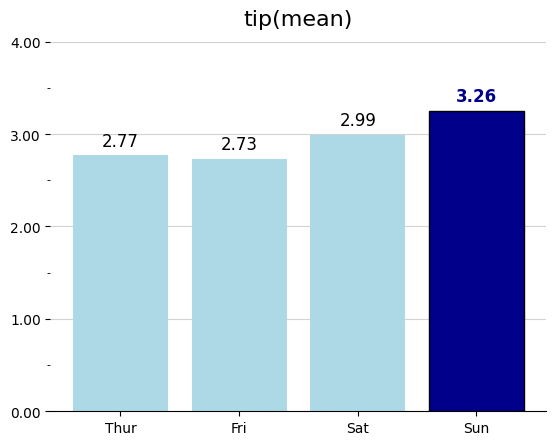

In [23]:
fig, ax = plt.subplots()
ax = plot_example(ax, zorder=2)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter('{x:0.2f}')
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.grid(axis="y", which="major", color="lightgray")
#ax.grid(axis="y", which="minor", ls=":")